# EE7209: Machine Learning Assignment 2



# Mobile Price Prediction Using Machine Learning

# EG/2017/3181 : Kumari M.A.W.K

# Part 2

# Data Visulization and Exploratory Data Analysis




In [1]:
import numpy as np # import numpy for linear algebra
import pandas as pd # import pandas fro data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# Input data files are available in the "./Data/" directory.
print(os.listdir("./data"))


['test(1).csv', 'train(1).csv']


In [3]:
#Lets understand the Dataset given
train = pd.read_csv('./data/train(1).csv')
test  = pd.read_csv('./data/test(1).csv')
print("Type of Dataset is :", type(train),"Shape of Dataset is:", train.shape)
train.describe()

Type of Dataset is : <class 'pandas.core.frame.DataFrame'> Shape of Dataset is: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
#Import librabries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

In [5]:
#pip install optuna


In [6]:
# Checking if there are null values in the dataset no need to Handling the missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Class of Price_range Distribution')

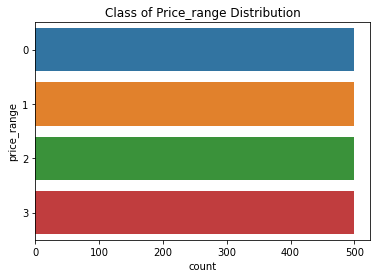

In [7]:
#Checking how many classes in target output

cp=sns.countplot(data=train ,y='price_range')
cp.set_title('Class of Price_range Distribution')

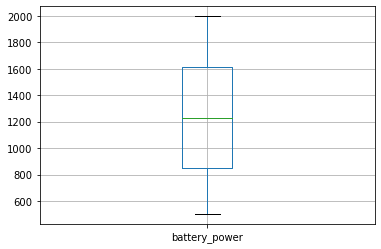

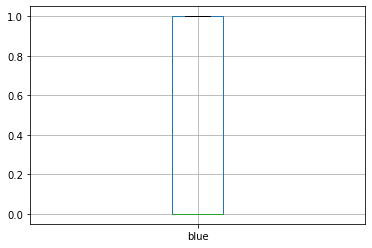

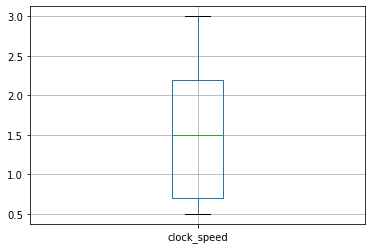

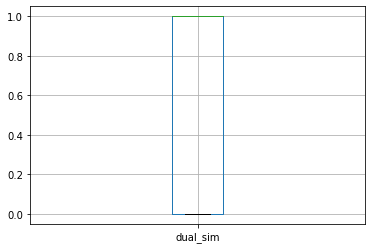

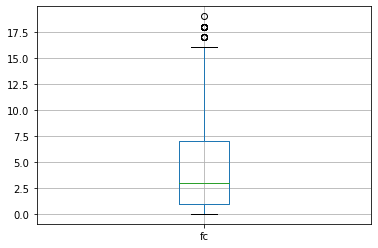

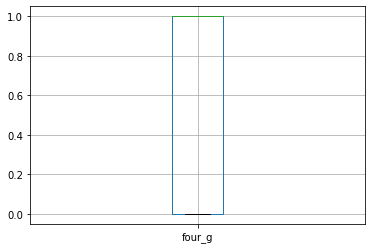

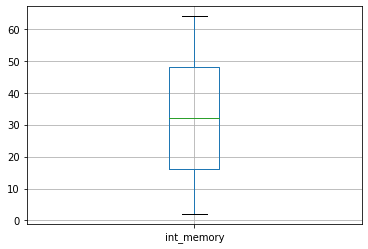

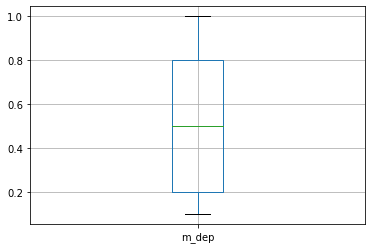

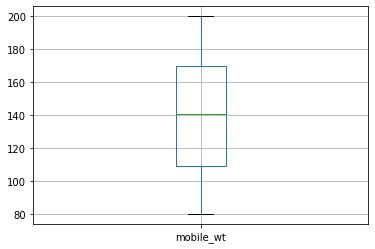

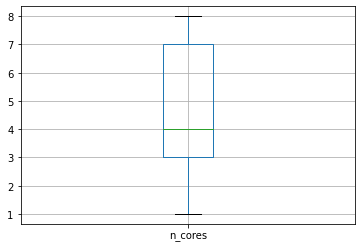

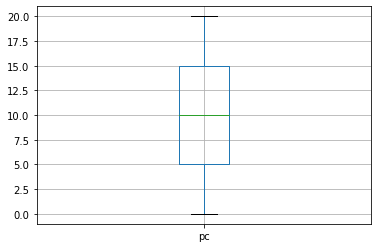

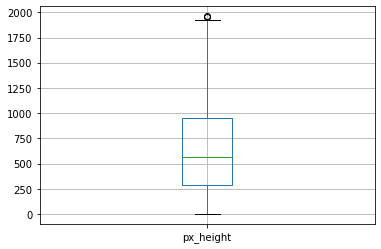

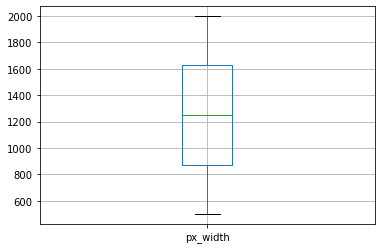

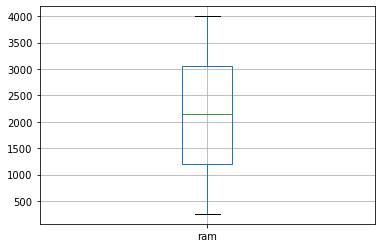

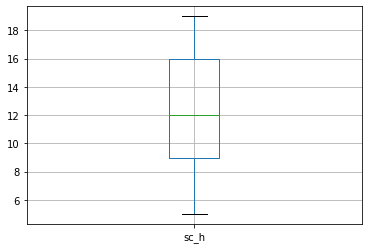

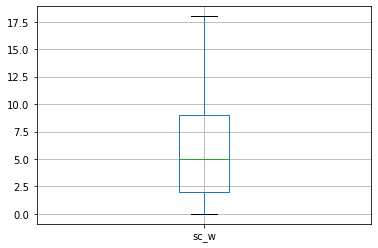

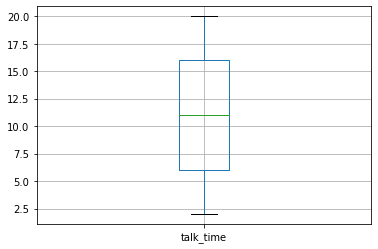

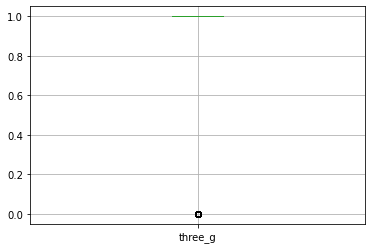

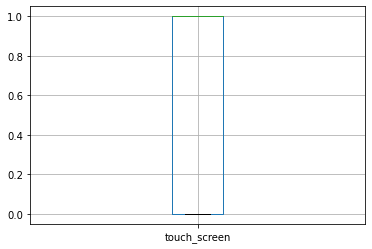

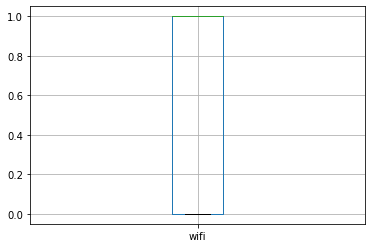

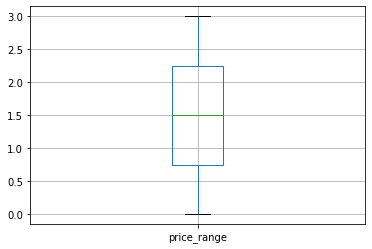

In [8]:
#Checking outliers by boxplot of all columns
for i in list(train.columns):
    train.boxplot(column=i)
    plt.show()


In [9]:
#Checking if there missing values in columns
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

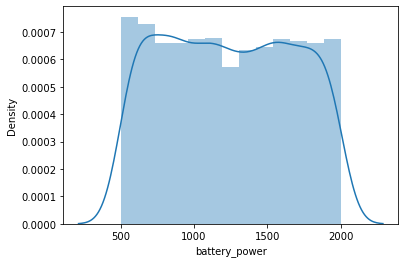

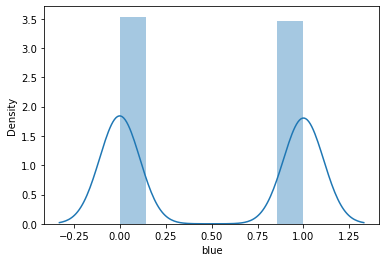

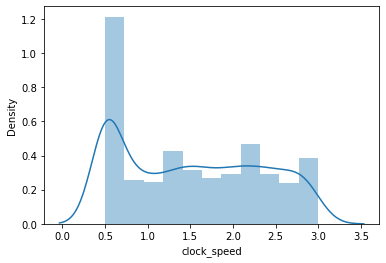

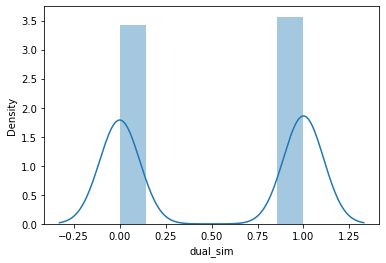

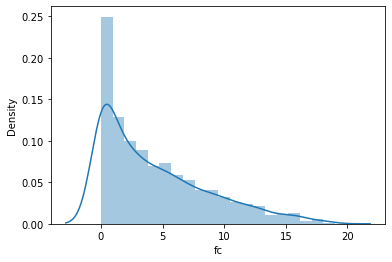

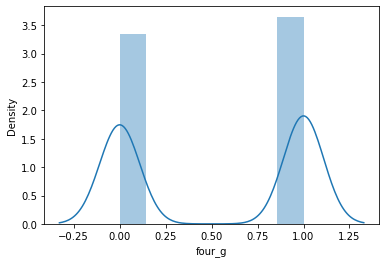

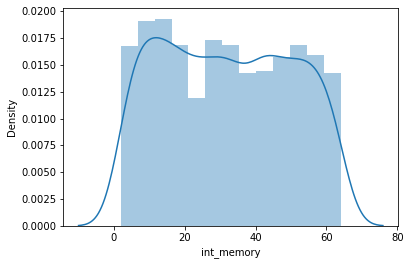

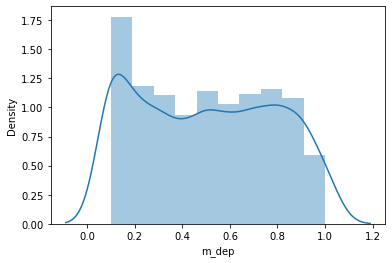

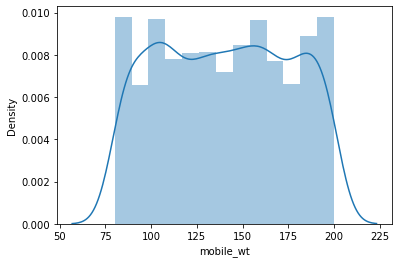

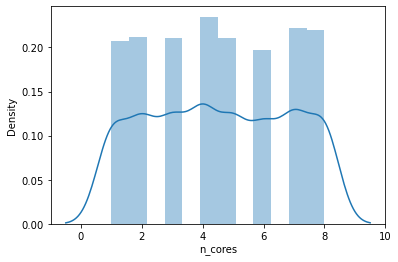

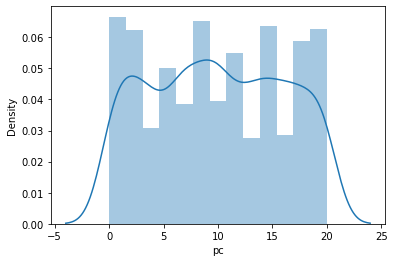

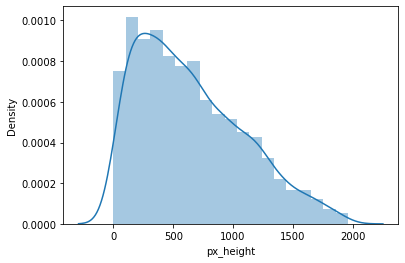

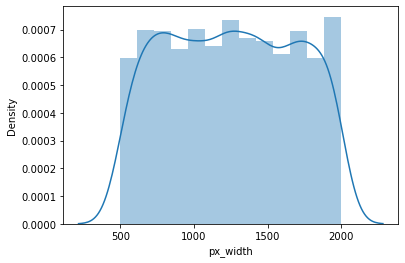

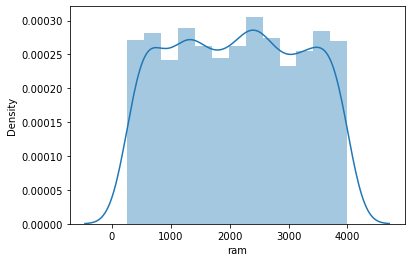

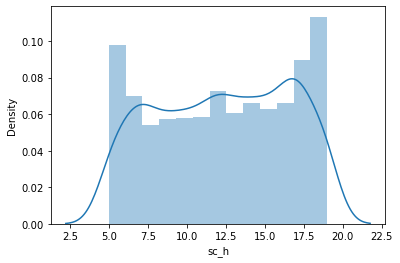

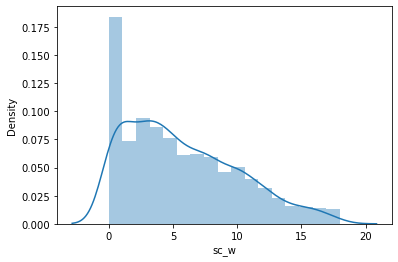

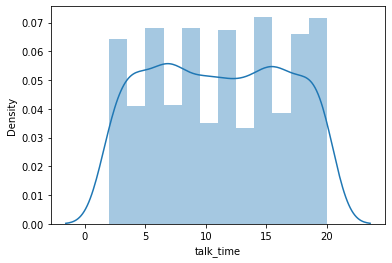

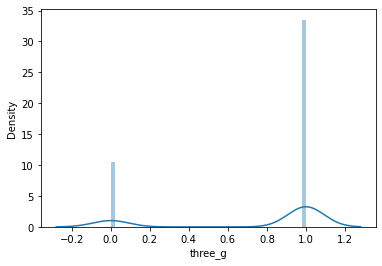

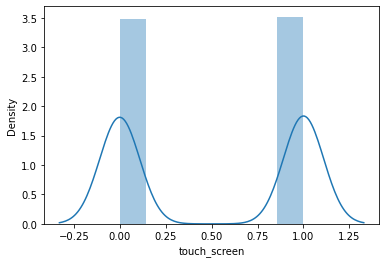

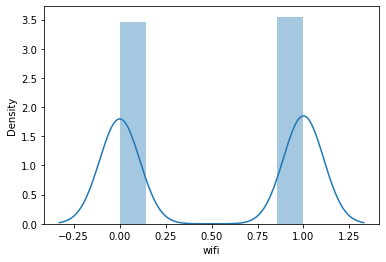

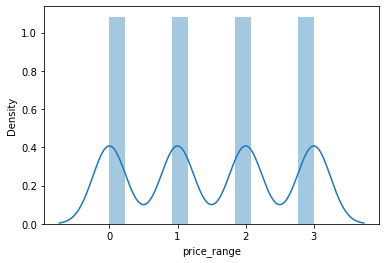

In [10]:
#Checking if the data in echa colums are normalized and scaled

for i, col in enumerate(train.columns):
    plt.figure(i)
    sns.distplot(train[col])


this has no categorical variabel and not scale 

# Selecting features based on correlation


<AxesSubplot:xlabel='ram', ylabel='int_memory'>

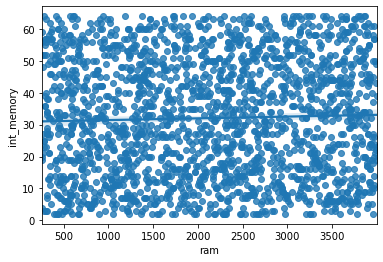

In [11]:
#Corraltion between featues

sns.regplot(x=train["ram"], y=train["int_memory"]) #Zero Correlation

In [12]:
# By pandas corr() we can Generate the correlation matrix 
corr_mat = train.corr() 

Text(0.5, 1.0, 'Correlation ')

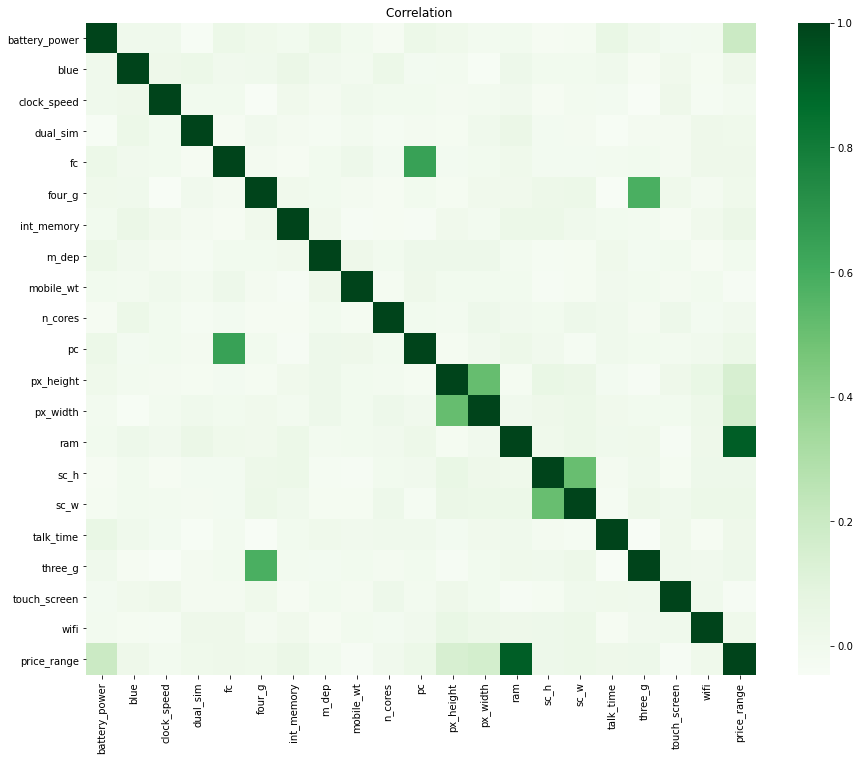

In [13]:
#Corraltion matrix obatined form the heatmap
fig = plt.figure(figsize=(15,12))
heatmap = sns.heatmap(corr_mat, cmap="Greens")
heatmap.set_title("Correlation ")


In [14]:
#Correlation of features with respect to price range
corr_mat.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [15]:
#Correlation of features with respect to pc
corr_mat.sort_values(by=["pc"],ascending=False).iloc[0].sort_values(ascending=False)

pc               1.000000
fc               0.644595
price_range      0.033599
battery_power    0.031441
ram              0.028984
m_dep            0.026282
mobile_wt        0.018844
talk_time        0.014657
wifi             0.005389
sc_h             0.004938
px_width         0.004196
n_cores         -0.001193
three_g         -0.001322
clock_speed     -0.005245
four_g          -0.005598
touch_screen    -0.008742
blue            -0.009952
dual_sim        -0.017143
px_height       -0.018465
sc_w            -0.023819
int_memory      -0.033273
Name: pc, dtype: float64

In [16]:
#Correlation of features with respect to three_g
corr_mat.sort_values(by=["three_g"],ascending=False).iloc[0].sort_values(ascending=False)

three_g          1.000000
four_g           0.584246
sc_w             0.030941
price_range      0.023611
ram              0.015795
touch_screen     0.013917
sc_h             0.012033
battery_power    0.011522
wifi             0.004316
fc               0.001793
mobile_wt        0.001551
px_width         0.000350
pc              -0.001322
int_memory      -0.009366
m_dep           -0.012065
dual_sim        -0.014008
n_cores         -0.014733
blue            -0.030236
px_height       -0.031174
talk_time       -0.042688
clock_speed     -0.046433
Name: three_g, dtype: float64

In [17]:
#Correlation of features with respect to sc_w
corr_mat.sort_values(by=["sc_w"],ascending=False).iloc[0].sort_values(ascending=False)

sc_w             1.000000
sc_h             0.506144
px_height        0.043038
price_range      0.038711
four_g           0.037005
ram              0.035576
wifi             0.035423
px_width         0.034699
three_g          0.030941
n_cores          0.025826
touch_screen     0.012720
int_memory       0.011731
blue             0.000613
clock_speed     -0.007378
fc              -0.012373
dual_sim        -0.016666
m_dep           -0.018388
mobile_wt       -0.020761
battery_power   -0.021421
talk_time       -0.022821
pc              -0.023819
Name: sc_w, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='ram'>

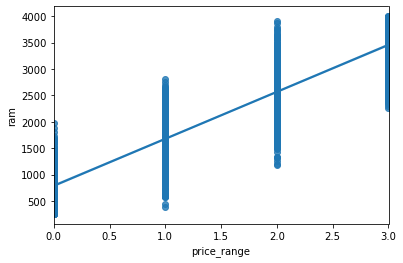

In [18]:
#Visualization of highly corralted columns
sns.regplot(x=train["price_range"], y=train["ram"])

In [19]:
#Discription of all colums in the train dataset
print(train.shape)
train.describe()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# 2.1 Data Preprocessing

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import warnings 
warnings.filterwarnings('ignore')

In [23]:
#Data spliting train and test
X=train.drop(['price_range','fc'],axis=1)#drop the dependant variable and highly correrlated columns
y=train['price_range']#assign independant variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,
                                               shuffle=True)

In [24]:
X_train.head()


,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1


In [25]:
#Generating a function to bind data in continous variables

def binning_data(data,q):
    data=pd.qcut(data,q=q,labels=False)
    return data

<AxesSubplot:ylabel='Frequency'>

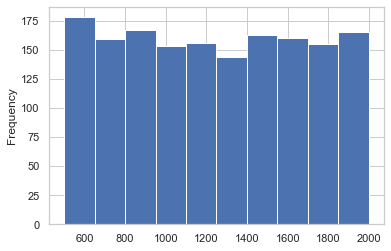

In [26]:
#histograms of the continous variable(battery_power) before binding
X_train['battery_power'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

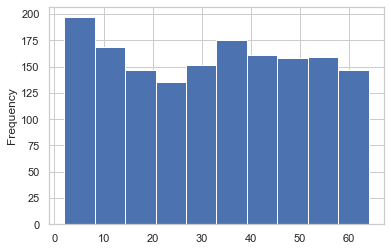

In [27]:
#histograms of the continous variable(int_memory) before binding
X_train['int_memory'].plot(kind='hist')

In [28]:
#Binding of Continous variables in train and test data
X_train['battery_power']=binning_data(X_train['battery_power'],10)
X_train['int_memory']=binning_data(X_train['int_memory'],10)
X_test['battery_power']=binning_data(X_test['battery_power'],10)
X_test['int_memory']=binning_data(X_test['int_memory'],10)

In [29]:
#Converting float type variables to integer
def float_to_int(data):
    data=np.round(data).astype(int)
    return data

X_train['clock_speed']=float_to_int(X_train['clock_speed'])
X_test['clock_speed']=float_to_int(X_test['clock_speed'])
X_train['m_dep']=float_to_int(X_train['m_dep'])
X_test['m_dep']=float_to_int(X_test['m_dep'])

<AxesSubplot:ylabel='Frequency'>

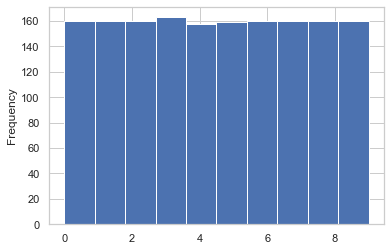

In [30]:
#histograms of the continous variable(batter_power) after binding
X_train['battery_power'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

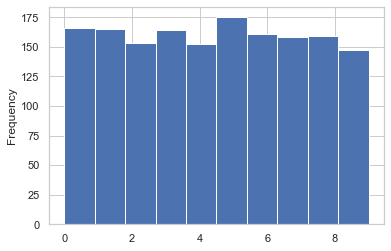

In [31]:
#histograms of the continous variable(int_memory) after binding
X_train['int_memory'].plot(kind='hist')

X_train['clock_speed']=float_to_int(X_train['clock_speed'])
X_test['clock_speed']=float_to_int(X_test['clock_speed'])

X_train['m_dep']=float_to_int(X_train['m_dep'])
X_test['m_dep']=float_to_int(X_test['m_dep'])

In [32]:
#Scaling the train and test daya before feed to the model
sc =MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
X_train.shape

(1600, 19)

In [34]:
y_train_nn=pd.get_dummies(y_train)
y_test_nn=pd.get_dummies(y_test)

# 2.2  Model Implementation

In [35]:
model_nn=Sequential()
model_nn.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model_nn.add(Dropout(0.5))
model_nn.add(BatchNormalization())
model_nn.add(Dense(64,activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(BatchNormalization())
model_nn.add(Dense(4,activation='softmax'))
    

In [36]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [37]:
model_nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')


In [38]:
tf.random.set_seed(42)
batch_size=64
epochs=400
estop=EarlyStopping(monitor='val_loss',mode='min',patience=15,verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',mode='min',patience=10,min_lr=1e-6)
model_nn.fit(X_train,y_train_nn,validation_data=(X_test,y_test_nn),epochs=epochs,batch_size=batch_size,callbacks=[estop,reduce_lr])

Epoch 1/400
25/25 [==============================] - 2s 12ms/step - loss: 1.8888 - accuracy: 0.2600 - val_loss: 1.3861 - val_accuracy: 0.2150 - lr: 0.0010
Epoch 2/400
25/25 [==============================] - 0s 7ms/step - loss: 1.7496 - accuracy: 0.2912 - val_loss: 1.3643 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/400
25/25 [==============================] - 0s 6ms/step - loss: 1.6785 - accuracy: 0.2831 - val_loss: 1.3453 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 4/400
25/25 [==============================] - 0s 6ms/step - loss: 1.5783 - accuracy: 0.2944 - val_loss: 1.3239 - val_accuracy: 0.3525 - lr: 0.0010
Epoch 5/400
25/25 [==============================] - 0s 6ms/step - loss: 1.4698 - accuracy: 0.3444 - val_loss: 1.2985 - val_accuracy: 0.4075 - lr: 0.0010
Epoch 6/400
25/25 [==============================] - 0s 6ms/step - loss: 1.4588 - accuracy: 0.3475 - val_loss: 1.2678 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 7/400
25/25 [==============================] - 0s 7ms/step - loss: 1.

Epoch 54/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8175 - val_loss: 0.2449 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 55/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4359 - accuracy: 0.8169 - val_loss: 0.2576 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 56/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.8306 - val_loss: 0.2530 - val_accuracy: 0.9225 - lr: 0.0010
Epoch 57/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4372 - accuracy: 0.8300 - val_loss: 0.2393 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 58/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4355 - accuracy: 0.8256 - val_loss: 0.2423 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 59/400
25/25 [==============================] - 0s 6ms/step - loss: 0.4093 - accuracy: 0.8406 - val_loss: 0.2222 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 60/400
25/25 [==============================] - 0s 6ms/step - lo

Epoch 107/400
25/25 [==============================] - 0s 7ms/step - loss: 0.2752 - accuracy: 0.8931 - val_loss: 0.1383 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 108/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.8819 - val_loss: 0.1474 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 109/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.9031 - val_loss: 0.1483 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 110/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.9131 - val_loss: 0.1405 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 111/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.9062 - val_loss: 0.1430 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 112/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2533 - accuracy: 0.9031 - val_loss: 0.1424 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 113/400
25/25 [==============================] - 0s 7ms/st

Epoch 159/400
25/25 [==============================] - 0s 6ms/step - loss: 0.2093 - accuracy: 0.9225 - val_loss: 0.1065 - val_accuracy: 0.9625 - lr: 1.0000e-04
Epoch 160/400
25/25 [==============================] - 0s 6ms/step - loss: 0.1796 - accuracy: 0.9375 - val_loss: 0.0996 - val_accuracy: 0.9650 - lr: 1.0000e-04
Epoch 161/400
25/25 [==============================] - 0s 6ms/step - loss: 0.1943 - accuracy: 0.9256 - val_loss: 0.1095 - val_accuracy: 0.9625 - lr: 1.0000e-04
Epoch 162/400
25/25 [==============================] - 0s 6ms/step - loss: 0.1791 - accuracy: 0.9375 - val_loss: 0.1056 - val_accuracy: 0.9675 - lr: 1.0000e-04
Epoch 163/400
25/25 [==============================] - 0s 6ms/step - loss: 0.1941 - accuracy: 0.9275 - val_loss: 0.1029 - val_accuracy: 0.9675 - lr: 1.0000e-04
Epoch 164/400
25/25 [==============================] - 0s 6ms/step - loss: 0.1797 - accuracy: 0.9381 - val_loss: 0.1004 - val_accuracy: 0.9675 - lr: 1.0000e-04
Epoch 165/400
25/25 [===================

In [39]:
#saving models 
model_nn.save('models/originalsaved_model.h5')

from keras.models import load_model
#new_model = load_model('models/saved_model2.h5')

#new_model.summary()

In [40]:
json_string = model_nn.to_json()
json_string

from keras.models import model_from_json
model_architecture = model_from_json(json_string)

model_architecture.summary()

model_nn.save_weights('models/my_model_weights_2.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

# 2.3 Performance of the algorithm

In [41]:
#Obtaining accuracy and loss graph
nn_hist=pd.DataFrame(model_nn.history.history)

In [42]:
def nn_history_acc(data):
    fig,ax=plt.subplots(figsize=(10,6))
    ax.plot(data['accuracy'],label='train_accuracy')
    ax.plot(data['val_accuracy'],label='val_accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    plt.legend(loc=(1.05,0.9))
    
def nn_history_loss(data):
    fig,ax=plt.subplots(figsize=(10,6))
    ax.plot(data['loss'],label='loss')
    ax.plot(data['val_loss'],label='val_loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    plt.legend(loc=(1.05,0.9))

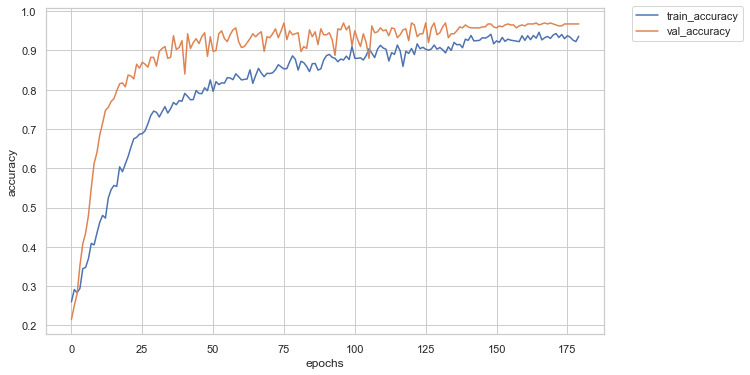

In [43]:
nn_history_acc(nn_hist)

In [44]:
def nn_history_loss(data):
    fig,ax=plt.subplots(figsize=(10,6))
    ax.plot(data['loss'],label='loss')
    ax.plot(data['val_loss'],label='val_loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    plt.legend(loc=(1.05,0.9))

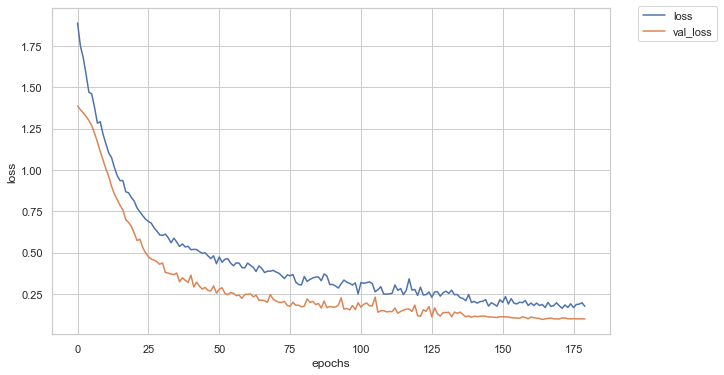

In [45]:
nn_history_loss(nn_hist)

In [46]:
#Obtaining Classification model
pred_nn=model_nn.predict(X_test)
pred_nn=np.round(pred_nn).astype(int)
acc_nn=accuracy_score(y_test_nn,pred_nn)
print("The Accuracy of the predictions of X_test",acc_nn)
print(classification_report(y_test_nn,pred_nn))

The Accuracy of the predictions of X_test 0.9675
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.94      0.99      0.96        91
           2       0.95      0.97      0.96        92
           3       0.99      0.96      0.97       112

   micro avg       0.97      0.97      0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400
 samples avg       0.97      0.97      0.97       400



In [47]:
#Obtaining confusion matrix
from sklearn.metrics import confusion_matrix
classes=['0','1','2','3']
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(pred_nn, axis=-1))
np.set_printoptions(precision=2)
cm

array([[101,   4,   0,   0],
       [  1,  90,   0,   0],
       [  0,   2,  89,   1],
       [  0,   0,   5, 107]], dtype=int64)

In [48]:
# generate Function to graphically represent the confusion matrix
import itertools
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[101   4   0   0]
 [  1  90   0   0]
 [  0   2  89   1]
 [  0   0   5 107]]


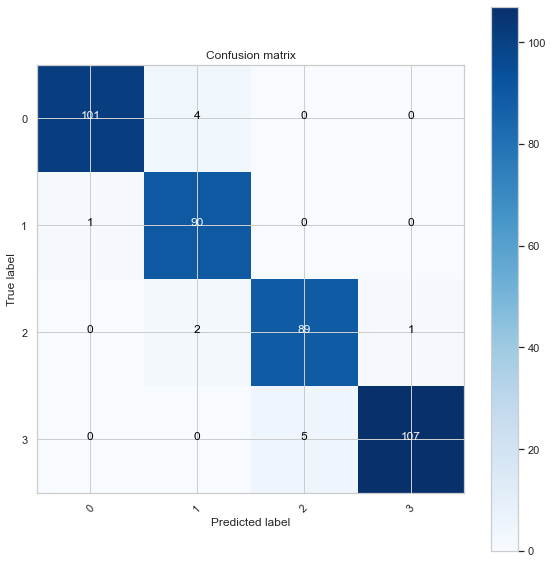

In [49]:
# Plot non-normalized confusion matrix

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=classes,
                      title='Confusion matrix')

# Predicting price range in test dataset

In [50]:
test_data=test.drop(['fc','id'],axis=1)#Droppingthe dependant variable and highly correrlated columns

In [51]:
test_data.head()
test_data.info

<bound method DataFrame.info of      battery_power  blue  clock_speed  dual_sim  four_g  int_memory  m_dep  \
0             1043     1          1.8         1       0           5    0.1   
1              841     1          0.5         1       1          61    0.8   
2             1807     1          2.8         0       0          27    0.9   
3             1546     0          0.5         1       1          25    0.5   
4             1434     0          1.4         0       1          49    0.5   
..             ...   ...          ...       ...     ...         ...    ...   
995           1700     1          1.9         0       1          54    0.5   
996            609     0          1.8         1       0          13    0.9   
997           1185     0          1.4         0       1           8    0.5   
998           1533     1          0.5         1       0          50    0.4   
999           1270     1          0.5         0       1          35    0.1   

     mobile_wt  n_cores  pc  px

In [52]:
test_data=sc.transform(test_data)

In [53]:

pred_price=model_nn.predict(test_data)
pred_price=np.round(pred_price).astype(int) #converting one hot encodings(prediction) into integers

print(len(pred_price))

# convert one hode coding output to decimal value

Pred_dec=np.argmax(pred_price, axis=1)
print(len(Pred_dec))

print('np.argmax(Predicted price Range by the model, axis=1): {0}'.format(Pred_dec))

print(type(Pred_dec))

Pred_dec=Pred_dec.tolist()
print(type(Pred_dec))

1000
1000
np.argmax(Predicted price Range by the model, axis=1): [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [54]:
#Assign new column with predictions
test['Predicted_Price_Range'] = Pred_dec
test



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted_Price_Range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,3
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,3
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,3
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,3


In [55]:


def highlight_cols(x):
      
    # copy df to new - original data is not changed
    df = x.copy()
      
    # select all values to green color
    df.loc[:, :] = 'background-color: white'
      
    # overwrite values grey color
    df['Predicted_Price_Range'] = 'background-color: pink'
    df['id'] = 'background-color: pink'
      
    # return color df
    return df 
  
print("Highlighted DataFrame :")
display(test.style.apply(highlight_cols, axis = None))

Highlighted DataFrame :


# Optomized model

In [56]:
from keras.models import load_model
new_model = load_model('models/saved_model.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [ ]:
#Converting int to one hot coding
y_test=y_test.to_numpy()

n_values= np.max(y_test) + 1
ynew=np.eye(n_values)[y_test]
ynewtest=ynew.astype(int)

# one hot encode

In [57]:
new_model.evaluate(X_test,ynewtest)

50/50 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9806


[0.06614842265844345, 0.9806249737739563]